In [43]:
from fastai.vision import *
from fastai.metrics import accuracy, error_rate
from tqdm import tqdm

In [2]:
# path to where the images are kept
root_ims = Path('images')

In [3]:
# path to where the train images are kept
train_ims = root_ims / 'train'

# path to where the test images are kept
test_ims = root_ims / 'test'

In [4]:
# loads and saves training ims path in list as posix Path
fnames = get_image_files(train_ims)
fnames[:5]

[PosixPath('images/train/08b6e3240858.png'),
 PosixPath('images/train/0182152c50de.png'),
 PosixPath('images/train/ee6e39319b39.png'),
 PosixPath('images/train/3bf3085ac167.png'),
 PosixPath('images/train/fe3b0e50be78.png')]

In [5]:
# df of training csv, contains image_name and labels
train_df = pd.read_csv('train.csv')
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
# creates a data loader
# fixing size to 224 of images
# TO-DO: try diferent model to take higher dimension images
data = ImageDataBunch.from_df(path=train_ims, df=train_df, size=224, suffix='.png', label_col=1)

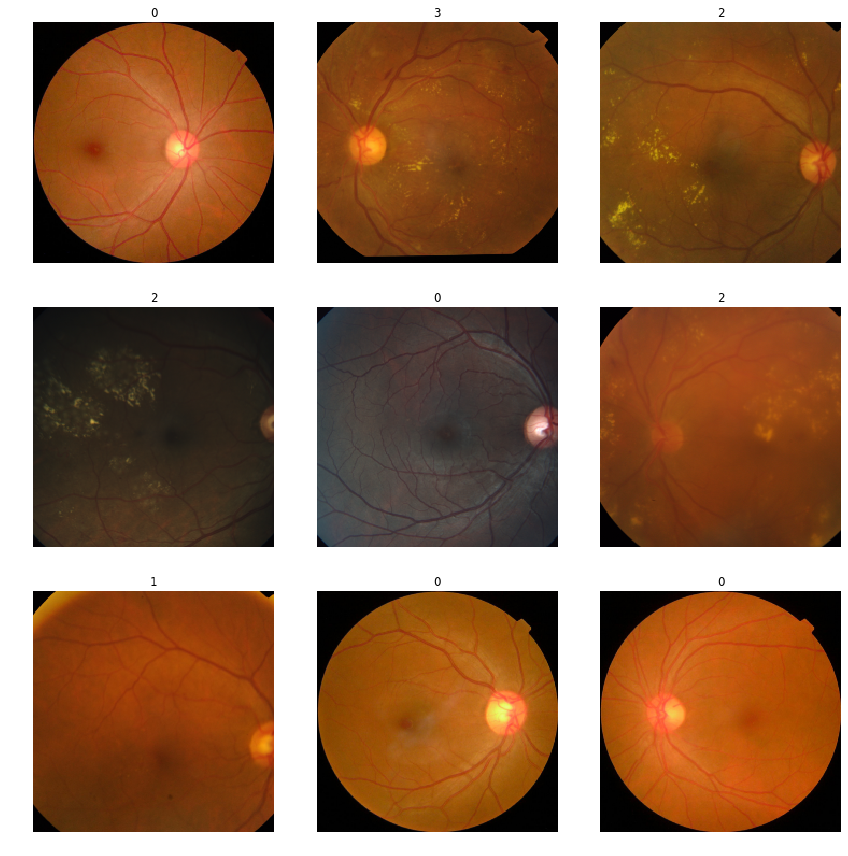

In [7]:
data.show_batch(rows=3)

In [9]:
# learn object created for training, most functions are executed on this object
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [17]:
# to find the optimal lr
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


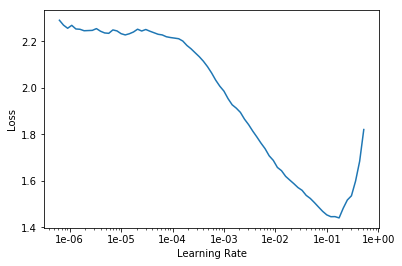

In [18]:
# plots the loss at different lr
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(3, max_lr=slice(1e-04, 1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.963578,0.685633,0.771858,02:29
1,0.698600,0.565022,0.790984,02:29
2,0.527380,0.519416,0.797814,02:28


In [20]:
learn.save('first')

In [10]:
# ; added so that model is not printed
learn.load('first');

## interpretation 
interpreting the missclassified images

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

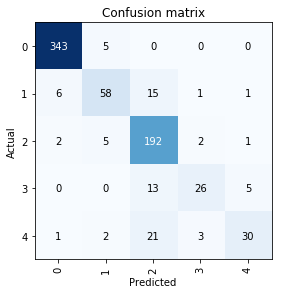

In [12]:
# confusion matrix of missclasified images
interp.plot_confusion_matrix()

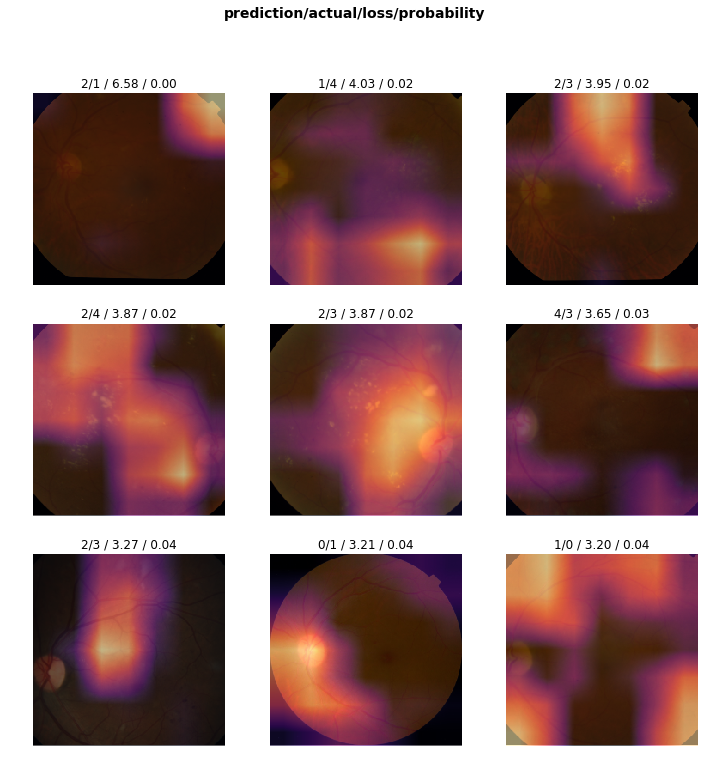

In [13]:
# plot of missclasified images
interp.plot_top_losses(9)

## Inference

In [19]:
# test dataframe
test_df = pd.read_csv('test.csv')
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [33]:
# gets the path of each image in the exact order as the test dataframe
test_im_name = list(test_df['id_code'].apply(lambda x: '{}.png'.format(test_ims/x)))

In [46]:
# does prediction and saves it in the list: pred_list
pred_list = []
for im_path in tqdm(test_im_name):
    im = open_image(im_path)
    _, category , _ = learn.predict(im)
    category = int(category)
    pred_list.append(category)

100%|██████████| 1928/1928 [02:58<00:00, 10.78it/s]


In [52]:
# adds the column of prediction in the test_df
test_df['diagnosis'] = pred_list
test_df.head()

,id_code,diagnosis
0,0005cfc8afb6,2
1,003f0afdcd15,3
2,006efc72b638,2
3,00836aaacf06,2
4,009245722fa4,2
